<a href="https://colab.research.google.com/github/nek07/inDrive_hackathon/blob/main/dirty_not_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π


In [ ]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu121
!pip install ultralytics --upgrade
!pip install ultralytics==8.0.118 scikit-learn pillow tqdm opencv-python albumentations -q
import zipfile, os

import os
import shutil
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
from PIL import Image

import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

2. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞


In [27]:

import zipfile

zip_path = '/content/clean-dirty car.v4i.folder.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("datasetclass")

# –ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É
!tree dataset -L 2

/bin/bash: line 1: tree: command not found


3. –°–æ–∑–¥–∞–Ω–∏–µ —è–º–ª —Ñ–∞–π–ª–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞–∑–≤–∞–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤ –∏ —Ñ–æ–ª–¥–µ—Ä–æ–≤


In [ ]:
import os
from pathlib import Path

train_dir = Path("dataset/train")
val_dir = Path("dataset/valid")

classes = [d.name for d in train_dir.iterdir() if d.is_dir()]
classes.sort()
print("–ö–ª–∞—Å—Å—ã:", classes)

yaml_content = f"""
names: {classes}
train: {str(train_dir)}
val: {str(val_dir)}
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

print(open("data.yaml").read())

–ö–ª–∞—Å—Å—ã: ['clean', 'dirty', 'slightly dirty', 'super clean', 'super dirty']

names: ['clean', 'dirty', 'slightly dirty', 'super clean', 'super dirty']
train: dataset/train
val: dataset/valid



4. –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ –º–æ–¥–µ–ª–µ–π

In [4]:
import torch
from ultralytics import YOLO

# –†–µ–≥–∏—Å—Ç—Ä–∏—Ä—É–µ–º –±–µ–∑–æ–ø–∞—Å–Ω—ã–π –∫–ª–∞—Å—Å –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏
torch.serialization.add_safe_globals([YOLO])

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
# model = YOLO("yolov8n-cls.pt", task="classify")  # –∏–ª–∏ yolov8s-cls.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="a86nTMAPVEfAne5s9OsD")
project = rf.workspace("testworkspace-7xg3d").project("dirty-2h4fa")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/data.yaml",  # –ø–æ–ª–Ω—ã–π –ø—É—Ç—å –∫ yaml
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)

In [ ]:
results = model.train(
    data="/content/dataset/",
    epochs=100,                     # –±–æ–ª—å—à–µ —ç–ø–æ—Ö (–º–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö ‚Üí –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç —É—á–∏—Ç—å—Å—è –¥–æ–ª—å—à–µ)
    imgsz=224,                      # –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –¥–æ 320 –∏–ª–∏ 416
    batch=8,                        # —É–º–µ–Ω—å—à–∏–º –±–∞—Ç—á (—Ç–∞–∫ –ª—É—á—à–µ –ø—Ä–∏ –º–∞–ª–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ)
    lr0=5e-4,                       # –ø–æ–Ω–∏–∂–∞–µ–º learning rate, —á—Ç–æ–±—ã –Ω–µ "–ø–µ—Ä–µ–ø—Ä—ã–≥–∏–≤–∞–ª"
    patience=15,                    # –¥–æ–ª—å—à–µ –∂–¥–µ–º –ø–µ—Ä–µ–¥ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–æ–π
    device=0 if torch.cuda.is_available() else "cpu",
    project="car_condition_project",
    name="exp_2class",               # –Ω–æ–≤–æ–µ –∏–º—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
    augment=True,                   # –≤–∫–ª—é—á–∞–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ (—É–≤–µ–ª–∏—á–∏–≤–∞–µ–º —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –¥–∞–Ω–Ω—ã—Ö)
    dropout=0.2                     # –¥–æ–±–∞–≤–ª—è–µ–º —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é (–µ—Å–ª–∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è)
)


–¢–µ—Å—Ç


YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs

0: 224x224 dirty 0.93, clean 0.07, 3.5ms
Speed: 24.1ms preprocess, 3.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ: dirty (0.93)


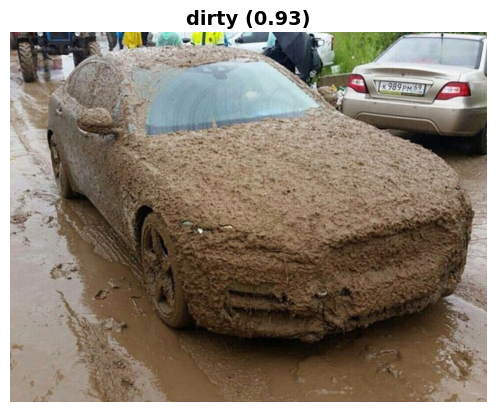

clean: 0.066
dirty: 0.934


In [31]:
import torch
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# 1. –ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
model = YOLO("/content/car_condition_project/exp_2class/weights/best.pt")

# 2. –ù–∞—Å—Ç—Ä–æ–π–∫–∏ (float32, GPU –µ—Å–ª–∏ –µ—Å—Ç—å)
model.fuse()
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.model.float()

# 3. –ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
img_path = "/content/car_condition_project/exp_2class/1701688023_sportishka-com-p-ochen-gryaznaya-mashina-vkontakte-3.jpg"  # –ø–æ–º–µ–Ω—è–π –Ω–∞ —Å–≤–æ–π –ø—É—Ç—å
image = Image.open(img_path).convert("RGB")

# 4. –ü—Ä–æ–≥–æ–Ω —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å
results = model(image)
res = results[0]

# 5. –î–æ—Å—Ç–∞—ë–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
class_id = int(res.probs.top1)
class_name = res.names[class_id]
confidence = float(res.probs.top1conf)

print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ: {class_name} ({confidence:.2f})")

# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ñ–æ—Ç–æ + –ø–æ–¥–ø–∏—Å—å
plt.imshow(image)
plt.axis("off")
plt.title(f"{class_name} ({confidence:.2f})", fontsize=14, weight="bold")
plt.show()

# 7. (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ) –≤—ã–≤–æ–¥–∏–º –≤—Å–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
for i, prob in enumerate(res.probs.data.tolist()):
    print(f"{res.names[i]}: {prob:.3f}")



image 1/1 /content/car_condition_project/exp_2class/i (2).webp: 480x640 1 Leaf, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict17


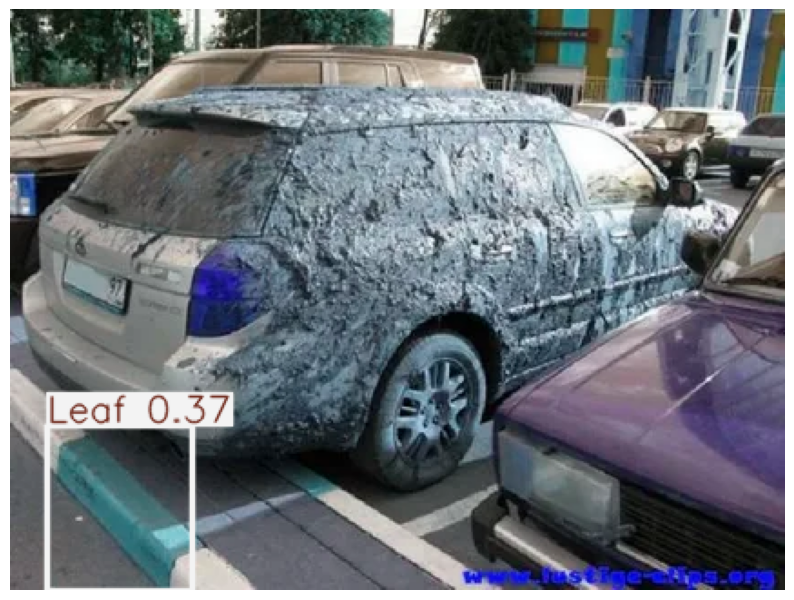

In [38]:
import torch
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
model = YOLO("/content/runs/detect/train5/weights/best.pt")

# –ü—É—Ç—å –∫ –∫–∞—Ä—Ç–∏–Ω–∫–µ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
img_path = "/content/car_condition_project/exp_2class/i (2).webp"  # –∑–∞–º–µ–Ω–∏ –Ω–∞ —Å–≤–æ—é –∫–∞—Ä—Ç–∏–Ω–∫—É

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
results = model(img_path, save=True, imgsz=640, conf=0.25)

# save=True —Å–æ—Ö—Ä–∞–Ω–∏—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –±–æ–∫—Å–∞–º–∏ –≤ runs/detect/predict/

# --- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä—è–º–æ –≤ –Ω–æ—É—Ç–±—É–∫–µ ---
# –ë–µ—Ä–µ–º –ø–µ—Ä–≤—É—é –∫–∞—Ä—Ç–∏–Ω–∫—É —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
res_plotted = results[0].plot()

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —á–µ—Ä–µ–∑ matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(res_plotted)
plt.axis("off")
plt.show()



üìä –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω—ã–π –æ—Ç—á–µ—Ç:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        70

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

‚úÖ –§–∏–Ω–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (Accuracy): 1.00 (100.0%)


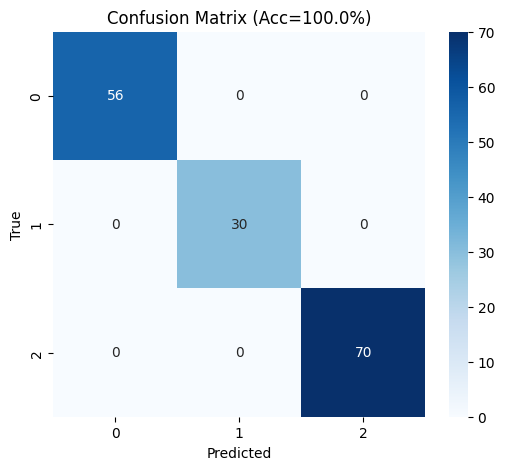

In [23]:
import os
import torch
from ultralytics import YOLO
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å ===
model = YOLO("/content/runs/detect/train5/weights/best.pt")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# === 2. –ü—É—Ç—å –∫ —Ç–µ—Å—Ç—É ===
test_dir = "/content/dataset/test/images"  # Roboflow –æ–±—ã—á–Ω–æ –∫–ª–∞–¥–µ—Ç —Å—é–¥–∞
labels_dir = "/content/dataset/test/labels"

# === 3. –°–æ–±–∏—Ä–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ ===
img_files = [f for f in os.listdir(test_dir) if f.endswith(".jpg") or f.endswith(".png")]

y_true = []
y_pred = []

for img_name in img_files:
    # –ø—É—Ç—å –∫ –∫–∞—Ä—Ç–∏–Ω–∫–µ –∏ –ª–µ–π–±–ª—É
    img_path = os.path.join(test_dir, img_name)
    label_path = os.path.join(labels_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # —á–∏—Ç–∞–µ–º ground truth –∫–ª–∞—Å—Å
    with open(label_path, "r") as f:
        gt_lines = f.readlines()
    # YOLO label: class x_center y_center w h
    gt_classes = [int(line.split()[0]) for line in gt_lines]

    # –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    results = model(img_path, device=device, verbose=False)[0]
    pred_classes = results.boxes.cls.cpu().numpy().astype(int).tolist()

    # ‚ö†Ô∏è –ü—Ä–æ—Å—Ç–µ–π—à–µ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ: –±–µ—Ä–µ–º –ø–µ—Ä–≤—ã–π GT –∏ –ø–µ—Ä–≤—ã–π –ø—Ä–µ–¥–∏–∫—Ç
    if len(gt_classes) > 0 and len(pred_classes) > 0:
        y_true.append(gt_classes[0])
        y_pred.append(pred_classes[0])

# === 4. –ú–µ—Ç—Ä–∏–∫–∏ ===
print("\nüìä –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω—ã–π –æ—Ç—á–µ—Ç:")
print(classification_report(y_true, y_pred))

acc = accuracy_score(y_true, y_pred)
print(f"‚úÖ –§–∏–Ω–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (Accuracy): {acc:.2f} ({acc*100:.1f}%)")

# === 5. Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Acc={acc*100:.1f}%)")
plt.show()
